# Creating data to view and fit

In [1]:
import tensorflow as tf

print(tf.__version__)

2.13.0


In [2]:
import datetime

print(f"notebook last run (end-to-end): {datetime.datetime.now()}")

notebook last run (end-to-end): 2023-07-11 15:08:04.082706


In [3]:
# importing dataset

from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000

# create circles
x, y = make_circles(n_samples, noise=0.03, random_state=42)

In [4]:
# we've created some data. looking at features (x) and labels (y)

x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [6]:
# make dataframe features and labels
import pandas as pd

circles = pd.DataFrame({"x0": x[:, 0], "x1": x[:, 1], "label": y})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [7]:
# what kind of labels are we dealing with?

# check out different labels
circles.label.value_counts()

# 0 ve 1. binary classification

label
1    500
0    500
Name: count, dtype: int64

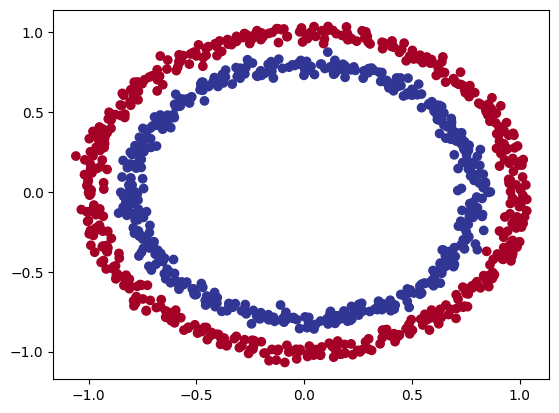

In [8]:
# visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

---
# Input and output shapes

In [9]:
# the shape of input data and the shape of output data must be equal

x.shape, y.shape

((1000, 2), (1000,))

In [10]:
# check how many samples we have

len(x), len(y)

(1000, 1000)

In [11]:
# view the first example of features and labels

x[0], y[0]

(array([0.75424625, 0.23148074]), 1)

---
# Steps in modelling

In TensorFlow, there are typically 3 fundamental steps to creating and training a model
1. **Creating a model**: piece together the layers of a neural network yourself (using the functional or sequential API) or import a previously built model (known as transfer learning)
2. **Compiling a model**: defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer) 
3. **Fitting a model**: letting the model trying to find patterns in the data (how does 'x' get to 'y')

In [12]:
tf.random.set_seed(42)

# 1. create the model using sequential api
model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# 2. compile the model
model_1.compile(
    # binary since we are working with 2 classes (0 and 1)
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"],
)

# 3. fit the model
model_1.fit(x, y, epochs=5)

Epoch 1/5


32/32 [==============================] - 0s 740us/step - loss: 6.1812 - accuracy: 0.4850
Epoch 2/5
32/32 [==============================] - 0s 613us/step - loss: 5.3244 - accuracy: 0.4490
Epoch 3/5
32/32 [==============================] - 0s 613us/step - loss: 4.8331 - accuracy: 0.4660
Epoch 4/5
32/32 [==============================] - 0s 645us/step - loss: 4.7298 - accuracy: 0.4700
Epoch 5/5
32/32 [==============================] - 0s 613us/step - loss: 3.7305 - accuracy: 0.4870


In [13]:
# train our model for longer (more chances to look at the data)
# set verbose=0 to remove training updates
model_1.fit(x, y, epochs=100, verbose=0)
model_1.evaluate(x, y)

32/32 [==============================] - 0s 581us/step - loss: 0.6932 - accuracy: 0.5000


[0.693244993686676, 0.5]

Even after 100 passes of the data, it's still performing as if it's guessing.

In [14]:
tf.random.set_seed(42)

# 1. create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential(
    [tf.keras.layers.Dense(1), tf.keras.layers.Dense(1)]  # add an extra layer
)

# 2. compile the model
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"],
)

# 3. fit the model
model_2.fit(x, y, epochs=100, verbose=0)

In [15]:
# evaluate the model
model_2.evaluate(x, y)

32/32 [==============================] - 0s 548us/step - loss: 0.6933 - accuracy: 0.5000


[0.6933218836784363, 0.5]

Still not even as good as guessing (~50% accuracy)

Let's remind ourselves of a couple more ways we can use to improve our models.

---
# Improving a model

To improve our model, we can alter almost every part of the 3 steps we went through before.

1. **Creating a model:** here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.

2. **Compilin a model:** you might want to choose a different optimization function (such as the Adam optimizer, which is usually pretty good for many problems) or perhaps change the learning rate of the optimization function.

3. **Fitting a model:** perhaps you could fit a model for more epochs (leave it training for longer).


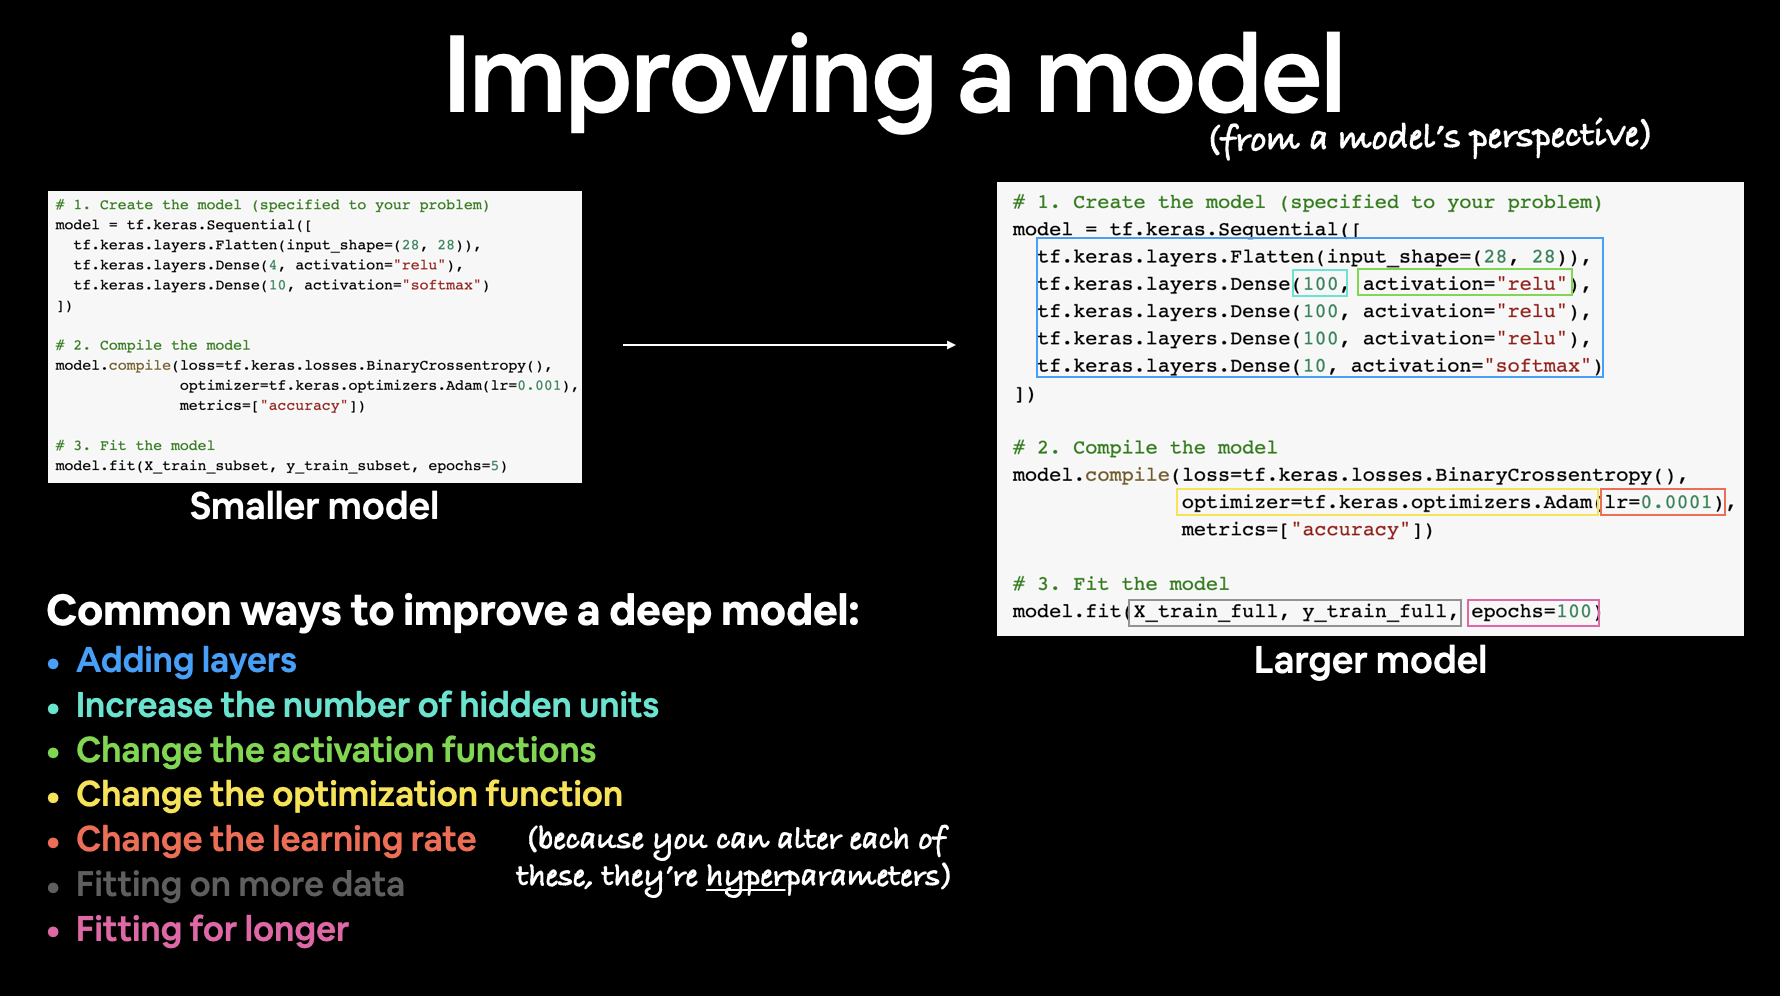

How about we try adding more neurons, an extra layer and our friend the Adam optimizer?

In [16]:
tf.random.set_seed(42)

# 1. create the model (this time 3 layers)
model_3 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100),  # add 100 dense neurons
        tf.keras.layers.Dense(10),  # add another layer with 10 neurons
        tf.keras.layers.Dense(1),
    ]
)

# 2. compile the model
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),  # use Adam instead of SGD
    metrics=["accuracy"],
)

# 3. fit the model
model_3.fit(x, y, epochs=100, verbose=1)  # fit for 100 passes of the data

Epoch 1/100
32/32 [==============================] - 0s 812us/step - loss: 2.0254 - accuracy: 0.4600
Epoch 2/100
32/32 [==============================] - 0s 677us/step - loss: 0.7045 - accuracy: 0.5030
Epoch 3/100
32/32 [==============================] - 0s 677us/step - loss: 0.6941 - accuracy: 0.4910
Epoch 4/100
32/32 [==============================] - 0s 645us/step - loss: 0.6969 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 645us/step - loss: 0.6964 - accuracy: 0.4750
Epoch 6/100
32/32 [==============================] - 0s 677us/step - loss: 0.6977 - accuracy: 0.4610
Epoch 7/100
32/32 [==============================] - 0s 645us/step - loss: 0.6960 - accuracy: 0.5110
Epoch 8/100
32/32 [==============================] - 0s 645us/step - loss: 0.6950 - accuracy: 0.5200
Epoch 9/100
32/32 [==============================] - 0s 677us/step - loss: 0.6999 - accuracy: 0.4970
Epoch 10/100
32/32 [==============================] - 0s 677us/step - loss: 0.6948 - accura

Let's make some visualizations to see what's happening.

To visualize our model's predictions we're going to create a function plot_decision_boundary() which:

+ Takes in a trained model, features (X) and labels (y).
+ Creates a meshgrid (ag izgarasi?) of the different X values.
+ Makes predictions across the meshgrid.
+ Plots the predictions as well as a line between the different zones (where each unique class falls).


In [17]:
import numpy as np


def plot_decision_boundary(model, x, y):
    # define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # create X values (we're going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()]

    # make predictions using the trained model
    y_pred = model.predict(x_in)

    # check for multi-class
    # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    if model.output_shape[-1] > 1:
        print("doing multiclass classification...")
        # we have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation...")
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

    # plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 436us/step
doing binary classifcation...


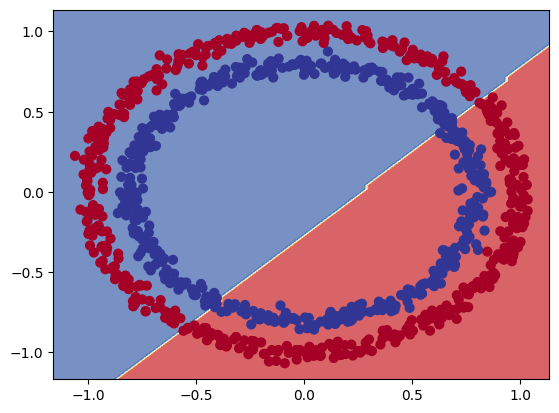

In [18]:
# check out the predictions our model is making
plot_decision_boundary(model_3, x, y)

Looks like our model is trying to draw a straight line through the data.

What's wrong with doing this?

The main issue is our data isn't separable by a straight line.

In a regression problem, our model might work. In fact, let's try it.

In [19]:
tf.random.set_seed(42)

# create some regression data
x_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# split it into training and test sets
x_reg_train = x_regression[:150]
x_reg_test = x_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# fit our model to the data
model_3.fit(tf.expand_dims(x_reg_train, axis=-1), y_reg_train, epochs=100)

# !!!!!!!!!!! BILINCLI ALINMIS HATA, GORMEZDEN GEL

Epoch 1/100


ValueError: in user code:

    File "C:\Users\AykQ\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\AykQ\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\AykQ\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\AykQ\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\AykQ\AppData\Roaming\Python\Python310\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\AykQ\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int32)
      • training=True
      • mask=None


In [20]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1321 (5.16 KB)
Trainable params: 1321 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



Oh wait... we compiled our model for a binary classification problem.

No trouble, we can recreate it for a regression problem.

In [21]:
tf.random.set_seed(42)

# recreate the model
model_3 = tf.keras.Sequential(
    [tf.keras.layers.Dense(100), tf.keras.layers.Dense(
        10), tf.keras.layers.Dense(1)]
)

# change the loss and metrics of our compiled model
model_3.compile(
    loss=tf.keras.losses.mae,  # change the loss function to be regression-specific
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"],
)  # change the metric to be regression-specific

# fit the recompiled model
model_3.fit(tf.expand_dims(x_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 447.3579 - mae: 447.3579
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 333.3975 - mae: 333.3975
Epoch 3/100
5/5 [==============================] - 0s 1000us/step - loss: 222.5243 - mae: 222.5243
Epoch 4/100
5/5 [==============================] - 0s 750us/step - loss: 105.9422 - mae: 105.9422
Epoch 5/100
5/5 [==============================] - 0s 750us/step - loss: 54.7218 - mae: 54.7218
Epoch 6/100
5/5 [==============================] - 0s 750us/step - loss: 84.5574 - mae: 84.5574
Epoch 7/100
5/5 [==============================] - 0s 1000us/step - loss: 64.9541 - mae: 64.9541
Epoch 8/100
5/5 [==============================] - 0s 1000us/step - loss: 43.4336 - mae: 43.4336
Epoch 9/100
5/5 [==============================] - 0s 750us/step - loss: 47.8995 - mae: 47.8995
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 41.4881 - mae: 41.4881
Epoch 11/100
5/5 [================

5/5 [==============================] - 0s 750us/step - loss: 41.4703 - mae: 41.4703
Epoch 18/100
5/5 [==============================] - 0s 1ms/step - loss: 41.1949 - mae: 41.1949
Epoch 19/100
5/5 [==============================] - 0s 1ms/step - loss: 41.1803 - mae: 41.1803
Epoch 20/100
5/5 [==============================] - 0s 1ms/step - loss: 41.1405 - mae: 41.1405
Epoch 21/100
5/5 [==============================] - 0s 1000us/step - loss: 41.2643 - mae: 41.2643
Epoch 22/100
5/5 [==============================] - 0s 749us/step - loss: 41.1033 - mae: 41.1033
Epoch 23/100
5/5 [==============================] - 0s 1000us/step - loss: 41.1802 - mae: 41.1802
Epoch 24/100
5/5 [==============================] - 0s 1000us/step - loss: 41.0859 - mae: 41.0859
Epoch 25/100
5/5 [==============================] - 0s 1ms/step - loss: 41.1146 - mae: 41.1146
Epoch 26/100
5/5 [==============================] - 0s 1ms/step - loss: 41.1478 - mae: 41.1478
Epoch 27/100
5/5 [==============================] 

It seems like our model is learning something (the mae value trends down with each epoch), let's plot its predictions.

2/2 [==============================] - 0s 2ms/step


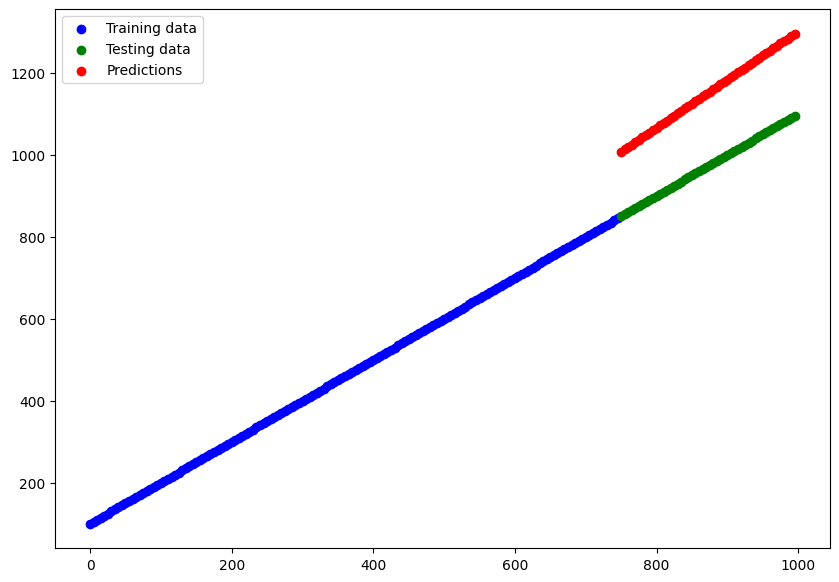

In [22]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(y_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(x_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(x_reg_test, y_reg_test, c="g", label="Testing data")
plt.scatter(x_reg_test, y_reg_preds.squeeze(), c="r", label="Predictions")
plt.legend()

Okay, the predictions aren't perfect (if the predictions were perfect, the red would line up with the green), but they look better than complete guessing.

So this means our model must be learning something...

There must be something we're missing out on for our classification problem.

---
# The missing piece: Non-linearity

We saw our neural network can model straight lines (with ability a little bit better than guessing).

What about non-straight (non-linear) lines?

If we're going to model our classification data (the red and blue circles), we're going to need some non-linear lines.

We're going to replicate the neural network you can see at this link: [TensorFlow Playground](https://playground.tensorflow.org/#activation=linear&batchSize=1&dataset=circle%C2%AEDataset=reg-plane&learningRate=0.01%C2%AEularizationRate=0&noise=0&networkShape=1&seed=0.09561&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false%C2%AEularizationRate_hide=true&discretize_hide=true%C2%AEularization_hide=true&dataset_hide=true&noise_hide=true&batchSize_hide=true)

+ The main change we'll add to models we've built before is the use of the activation keyword.

In [23]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    # 1 hidden layer with linear activation
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
    tf.keras.layers.Dense(1)  # output layer
])

model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(
                    learning_rate=0.001),  # default = 0.001
                metrics=['accuracy']
                )

model_4.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 746us/step - loss: 6.3925 - accuracy: 0.4880
Epoch 2/100
32/32 [==============================] - 0s 631us/step - loss: 6.3399 - accuracy: 0.4880
Epoch 3/100
32/32 [==============================] - 0s 645us/step - loss: 6.2998 - accuracy: 0.4920
Epoch 4/100
32/32 [==============================] - 0s 645us/step - loss: 6.2729 - accuracy: 0.4910
Epoch 5/100
32/32 [==============================] - 0s 667us/step - loss: 6.2764 - accuracy: 0.4920
Epoch 6/100
32/32 [==============================] - 0s 677us/step - loss: 6.2610 - accuracy: 0.4920
Epoch 7/100
32/32 [==============================] - 0s 645us/step - loss: 6.2582 - accuracy: 0.4930
Epoch 8/100
32/32 [==============================] - 0s 774us/step - loss: 6.2376 - accuracy: 0.4910
Epoch 9/100
32/32 [==============================] - 0s 710us/step - loss: 6.1657 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 936us/step - loss: 6.1277 - accura

Our model performs a little worse than guessing.

Let's remind ourselves what our data looks like

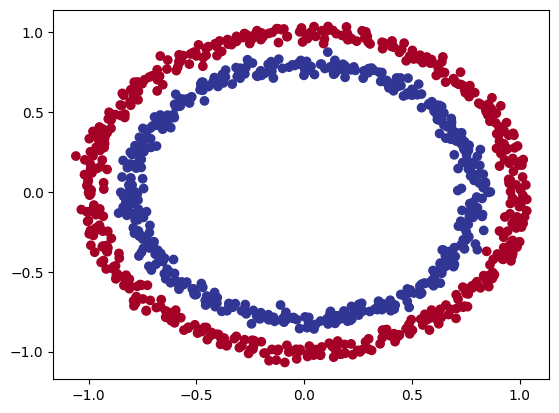

In [24]:
# check our data
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

And let's see how our moel is making predictions on it.

313/313 [==============================] - 0s 442us/step
doing binary classifcation...


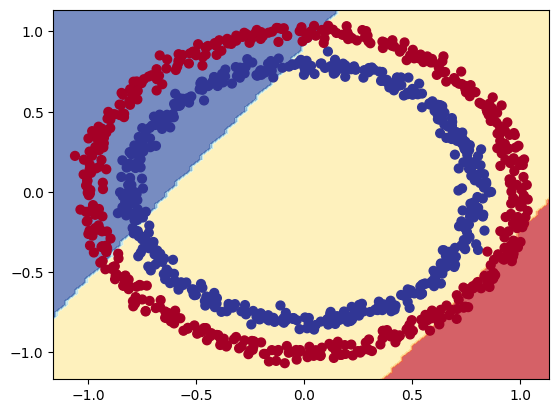

In [25]:
# check the decision boundary (blue is blue class, yellow is crossover, red is red class)
plot_decision_boundary(model_4, x, y)

It looks like we're getting a straight (linear) line prediction again.

But our data is non-linear.

What we're going to have to do is add some non-linearity to our model.

To do so, we'll use the 'activation' parameter in on of our layers.

In [26]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(1),
    ]
)

model_5.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"],
)

history = model_5.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 707us/step - loss: 5.5842 - accuracy: 0.4780
Epoch 2/100
32/32 [==============================] - 0s 645us/step - loss: 5.4204 - accuracy: 0.4780
Epoch 3/100
32/32 [==============================] - 0s 645us/step - loss: 5.2513 - accuracy: 0.4790
Epoch 4/100
32/32 [==============================] - 0s 645us/step - loss: 4.8679 - accuracy: 0.4710
Epoch 5/100
32/32 [==============================] - 0s 645us/step - loss: 4.6325 - accuracy: 0.4690
Epoch 6/100
32/32 [==============================] - 0s 604us/step - loss: 4.5757 - accuracy: 0.4660
Epoch 7/100
32/32 [==============================] - 0s 613us/step - loss: 4.5440 - accuracy: 0.4680
Epoch 8/100
32/32 [==============================] - 0s 613us/step - loss: 4.5355 - accuracy: 0.4690
Epoch 9/100
32/32 [==============================] - 0s 645us/step - loss: 4.4887 - accuracy: 0.4680
Epoch 10/100
32/32 [==============================] - 0s 677us/step - loss: 4.4691 - accura

Still not learning.

What we if increased the numberof neurons and layers?

Say, 2 hidden layers with ReLU activation on the first one, and 4 neurons each?

In [27]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential(
    [
        # hidden layer 1, 4 neurons, relu activation
        tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
        # hidden layer 2, 4 neurons, relu activation
        tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(1),
    ]
)

model_6.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

history = model_6.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 780us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 701us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 677us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 645us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 677us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 677us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 677us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 677us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 677us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 677us/step - loss: 7.7125 - accura

In [28]:
model_6.evaluate(x, y)

32/32 [==============================] - 0s 613us/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

We're still 50% accuracy, our model is still practically as good as guessing.

How do the predictions look?

313/313 [==============================] - 0s 461us/step
doing binary classifcation...


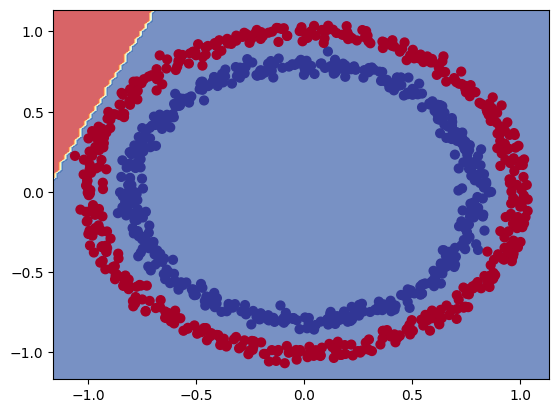

In [29]:
plot_decision_boundary(model_6, x, y)

It seems like our model is the same on in the TensorFlow Playground but model it's still drawing straight lines.

Ideally, the yellow lines go on the inside of the red circle and blue circle.

This time we'll change the activation function on our output layer too. Remember the architecture of a classification model? 
 
For binary classification, the output layer activation is usually the Sigmoid activation function.

In [30]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid") # output layer, sigmoid activation
    ]
)

model_7.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"],
)

history = model_7.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 742us/step - loss: 0.6928 - accuracy: 0.5050
Epoch 2/100
32/32 [==============================] - 0s 665us/step - loss: 0.6922 - accuracy: 0.4990
Epoch 3/100
32/32 [==============================] - 0s 645us/step - loss: 0.6916 - accuracy: 0.5040
Epoch 4/100
32/32 [==============================] - 0s 1000us/step - loss: 0.6912 - accuracy: 0.5060
Epoch 5/100
32/32 [==============================] - 0s 774us/step - loss: 0.6910 - accuracy: 0.5080
Epoch 6/100
32/32 [==============================] - 0s 677us/step - loss: 0.6907 - accuracy: 0.5060
Epoch 7/100
32/32 [==============================] - 0s 710us/step - loss: 0.6903 - accuracy: 0.5050
Epoch 8/100
32/32 [==============================] - 0s 645us/step - loss: 0.6900 - accuracy: 0.5060
Epoch 9/100
32/32 [==============================] - 0s 645us/step - loss: 0.6895 - accuracy: 0.5050
Epoch 10/100
32/32 [==============================] - 0s 645us/step - loss: 0.6893 - accur

It looks like our model is gettings some incredible results, let's check them out.

313/313 [==============================] - 0s 458us/step
doing binary classifcation...


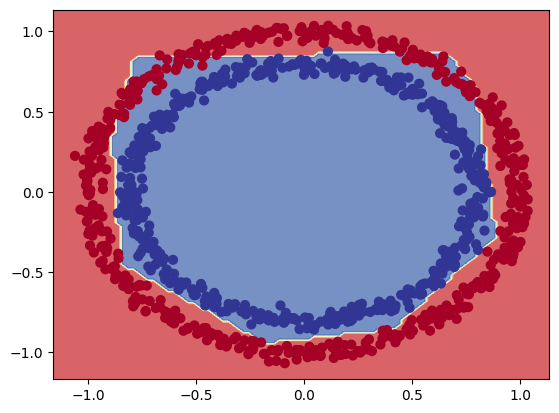

In [31]:
# view the predictions of the model with relu and sigmoid activations

plot_decision_boundary(model_7, x, y)

Looks like our model is almost perfectly (apart from few examples) seperating the two circles.

To get understand activation functions we've just used, let's create them and then try them son some toy data.

In [32]:
# create a toy tensor (similar to the data we pass into our model)

a = tf.cast(tf.range(-10, 10), tf.float32)
a

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

How does it look?

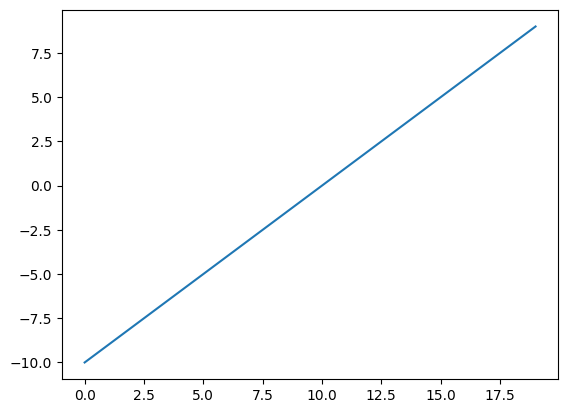

In [33]:
# visualize our toy tensor

plt.plot(a)

A straight (linear) line.

Now let's recreate the sigmoid function and see what it does to our data. 

You can also find a pre-built sigmoid function at 'tf.keras.activations.sigmoid'.

Matematiksel fonksiyonlar kullanarak sigmoid fonksiyonunu kendimiz oluşturuyoruz. Zaten hazır bulunan sigmoid fonksiyonu da kullanılabilir. (tf.keras.activations.sigmoid)

In [34]:
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))


# use the sigmoid function on our tensor
sigmoid(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

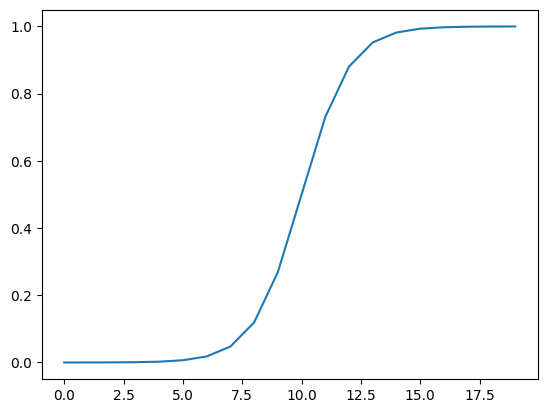

In [35]:
# plot sigmoid modified tensor
plt.plot(sigmoid(a))

A non-straight (non-linear) line.

How about the ReLU function (ReLU turns all negatives to 0 and positive numbers stay the same).

Burda da yine üstteki gibi aynı şekilde ReLU fonskiyonunu kendimiz oluşturuyoruz.

In [36]:
def relu(x):
    return tf.maximum(0, x)


# pass toy tensor through ReLU function
relu(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

How does the ReLU-modified tensor look?

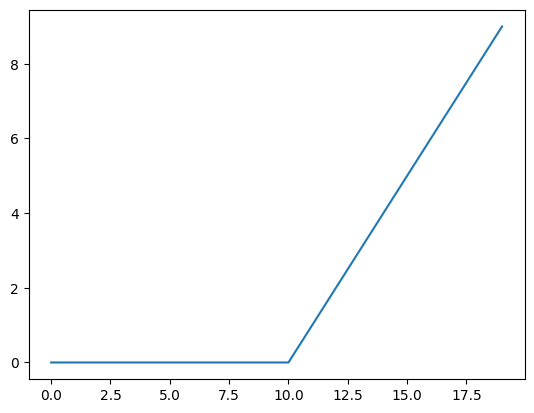

In [37]:
plt.plot(relu(a))

Another non-straight line.

How about TensorFlow's linear activation function?

In [38]:
tf.keras.activations.linear(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

Inputs are unmodified.

Model doesn't really learn anything when using only linear activation functions, because the linear activation function doesn't change our input data in anyway.

Where as, with our non-linear functions, our data gets manipulated. A neural network uses these kind of transformations at a large scale to figure draw patterns between its inputs and outputs.



---
# Evaluating and improving our classification model

We've been evaluating our model on the same data it was trained on.

A better aproach would be to split our data into training, validation(optional) and test sets.

Once we've done that, we'll train our model on the training set (let it find patterns in the data) and then see how well it learned the patterns by using it o predict values on the test set.

In [39]:
# how many examples are in the whole dataset?

len(x)

1000

In [40]:
# split data into train and test sets

x_train, y_train = x[:800], y[:800]  # 80% of the data for the training set
x_test, y_test = x[800:], y[800:]  # 20% of the data for test set

# check the shapes of the data
x_train.shape, x_test.shape

((800, 2), (200, 2))

Now we've got training and test sets, let's model the training data and evaluate what our model has learned on the test set.

In [41]:
tf.random.set_seed(42)

# create the mode (same as model_7)
model_8 = tf.keras.Sequential([
    # hidden layer 1, activation='relu'
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    # output layer, using 'sigmoid' for output
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# sigmoid, binary classificationda kullanılıyor.
# elimizdeki değerler 0 ve 1 arasında olduğu için sigmoid kullanıyoruz.

model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                # increase learning rate from 0.001 to 0.01 for faster learning
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

history = model_8.fit(x_train, y_train, epochs=25)

Epoch 1/25


25/25 [==============================] - 0s 792us/step - loss: 0.6936 - accuracy: 0.4875
Epoch 2/25
25/25 [==============================] - 0s 625us/step - loss: 0.6919 - accuracy: 0.4963
Epoch 3/25
25/25 [==============================] - 0s 667us/step - loss: 0.6899 - accuracy: 0.5312
Epoch 4/25
25/25 [==============================] - 0s 625us/step - loss: 0.6877 - accuracy: 0.5238
Epoch 5/25
25/25 [==============================] - 0s 625us/step - loss: 0.6838 - accuracy: 0.5575
Epoch 6/25
25/25 [==============================] - 0s 625us/step - loss: 0.6728 - accuracy: 0.5475
Epoch 7/25
25/25 [==============================] - 0s 667us/step - loss: 0.6620 - accuracy: 0.6012
Epoch 8/25
25/25 [==============================] - 0s 625us/step - loss: 0.6557 - accuracy: 0.6137
Epoch 9/25
25/25 [==============================] - 0s 667us/step - loss: 0.6423 - accuracy: 0.6187
Epoch 10/25
25/25 [==============================] - 0s 675us/step - loss: 0.6270 - accuracy: 0.6587
Epoch 11/2

In [42]:
# evaluate our model
loss, accuracy = model_8.evaluate(x_test, y_test)
print(f"model loss on the test set: {loss}")
print(f"model accuracy on the test set: {100*accuracy:.2f}%")

# 98% accuracy for now
# 0.0930 loss for now

7/7 [==============================] - 0s 939us/step - loss: 0.3700 - accuracy: 0.8650
model loss on the test set: 0.369999498128891
model accuracy on the test set: 86.50%


We know our model is performing well based on the evaluation metrics but let's see how it performs visually.

313/313 [==============================] - 0s 452us/step
doing binary classifcation...
313/313 [==============================] - 0s 436us/step
doing binary classifcation...


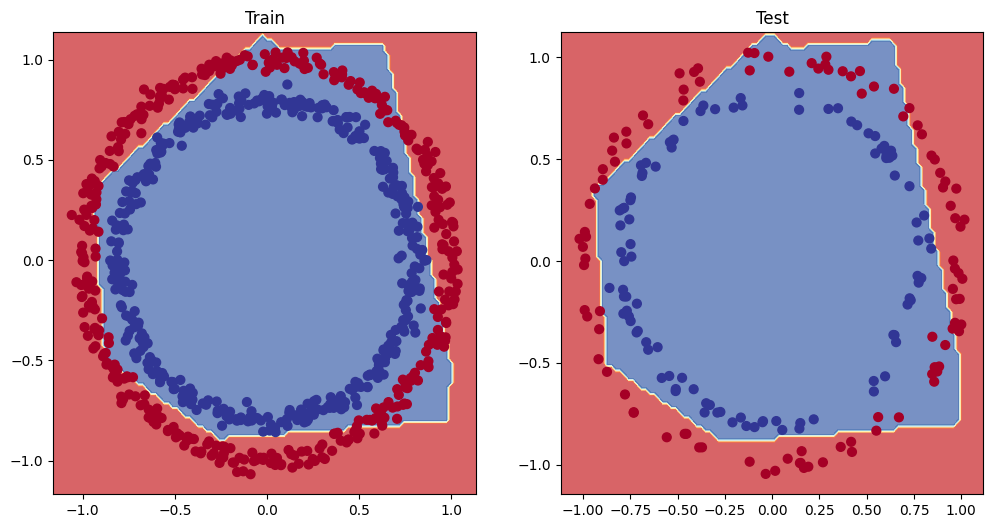

In [43]:
# plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, x=x_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, x=x_test, y=y_test)
plt.show()

With a few tweaks, our model is now predicting the blue and red circles almost perfectly.

---
# Plot the loss curves

Looaking at the plots above, we can see the outputs of our model are very good.

But how did our model go whilst it was learning.

How did the performance change, everytime the model had a chance to look at the data (once every epoch)?

To figure this out, we can check the **loss curves** also referred **learning curves**

In [44]:
# you can access the information in the history variable using the .history attribute

pd.DataFrame(history.history)

,loss,accuracy
0,0.693637,0.48750
1,0.691934,0.49625
2,0.689860,0.53125
3,0.687748,0.52375
4,0.683804,0.55750
5,0.672815,0.54750
6,0.661951,0.60125
7,0.655730,0.61375
8,0.642320,0.61875
9,0.627031,0.65875


Inspecting the outputs, we can see the loss values going down and the accuracy going up.

How's it look (let's visualize)?

Text(0.5, 1.0, 'model_8 training curves')

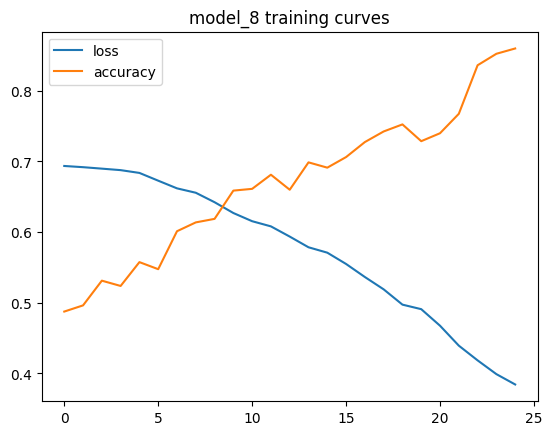

In [45]:
# plot the loss curves

pd.DataFrame(history.history).plot()
plt.title('model_8 training curves')

This is the ideal plot we'd be looking for when dealing with a classification problem, loss going down, accuracy going up.

---
# Finding the best learning rate

Aside from the architecture itsel (the layers, number of neurons, activations, etc.) the most important hyperparameter we can tune for our neural network models is the **learning rate**.

In model_8 we saw we lowered the Adam optimizer's learning rate from the default of 0.001 to 0.01.

Trick: Help us find the optimal learning rate (at least to begin training with) for our models going forward.

To do so, we're going to use the following:
+ A learning rate callback.
    + You can think of a callback as an extra piece of functionality you can add to your model while its training.
+ Another model (we could use the same ones as above, we're practicing building models here).
+ A modified loss curves plot.

In [46]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

model_9.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

# create a learning rate scheduler callback
# traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch(20)) every epoch.
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10**(epoch/20))

history = model_9.fit(x_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 709us/step - loss: 0.6924 - accuracy: 0.4888 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 667us/step - loss: 0.6923 - accuracy: 0.4812 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 625us/step - loss: 0.6923 - accuracy: 0.4812 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 625us/step - loss: 0.6922 - accuracy: 0.4812 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 667us/step - loss: 0.6922 - accuracy: 0.4837 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 667us/step - loss: 0.6921 - accuracy: 0.4850 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 625us/step - loss: 0.6920 - accuracy: 0.4863 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 625us/step - loss: 0.6920 - accuracy: 0.4837 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 

Our model has finished training, let's have a look at the training history.

<Axes: xlabel='epochs'>

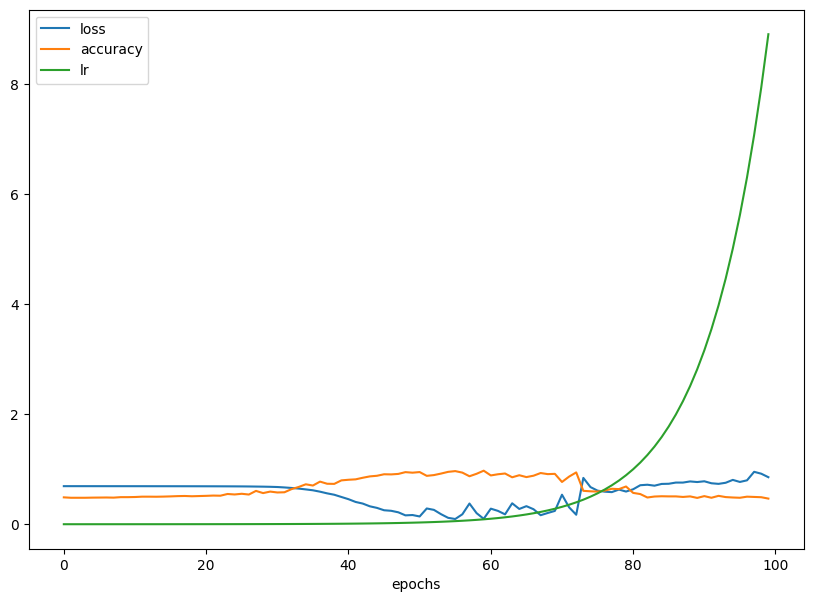

In [47]:
# checkout the history
pd.DataFrame(history.history).plot(figsize=(10, 7), xlabel='epochs')

As you see the learning rate exponentially increases as the number of epochs increases.

And you can see the model' accuracy goes up (and loss goes down) at a specific point when the learning rate slowly increases.

To figure out where this infliction point is, we can plot the loss versus the log-scale learning rate.

Text(0.5, 1.0, 'learning rate vs loss')

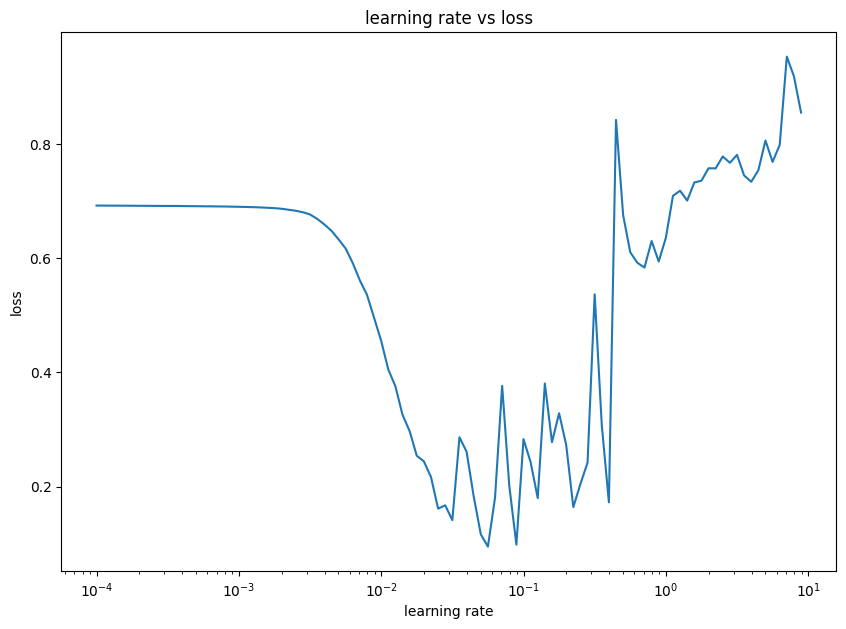

In [48]:
# plot the learning rate versus the loss

lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history['loss']) # we want the x-axis (learning rate) to be log scale
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('learning rate vs loss')

Take the learning rate value where the loss is still decreasing but not quite flattened out (usually about 10x smaller than the bottom of the curve).

In this case, out ideal learning rate ends up between 0.01 (10^-2) and 0.02.

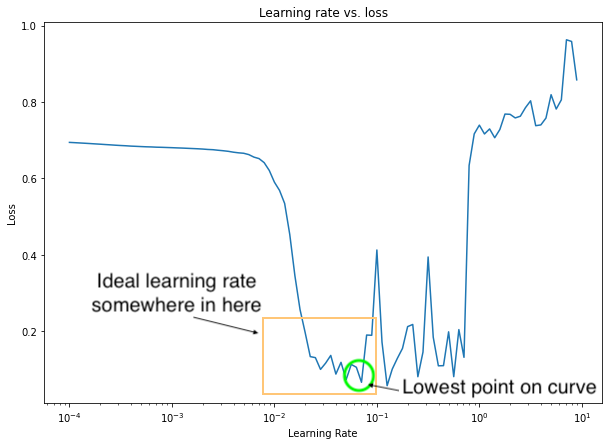

The ideal learning rate at the start of the model tarining is somewhere just before the loss curve bottoms out (a value where to loss is still decreasing)

In [49]:
# example of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 10**-4 # (onbinde bir, 1e-4)

(1, 0.1, 0.01, 0.001, 0.0001)

Now we've estimated the ideal leaerning rate (we'll use 0.02) for our model, let's refit it.

In [50]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model with ideal learning rate
model_10.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), # learning rate ayarlamak icin bu sekilde kullanmamiz lazim
                 metrics=['accuracy']
)

# fit the model for 20 epochs (5 less than before)
history = model_10.fit(x_train,
                       y_train,
                       epochs=20)

Epoch 1/20


25/25 [==============================] - 0s 792us/step - loss: 0.6873 - accuracy: 0.5562
Epoch 2/20
25/25 [==============================] - 0s 625us/step - loss: 0.6759 - accuracy: 0.5913
Epoch 3/20
25/25 [==============================] - 0s 667us/step - loss: 0.6533 - accuracy: 0.6125
Epoch 4/20
25/25 [==============================] - 0s 667us/step - loss: 0.6104 - accuracy: 0.7225
Epoch 5/20
25/25 [==============================] - 0s 666us/step - loss: 0.5589 - accuracy: 0.7700
Epoch 6/20
25/25 [==============================] - 0s 625us/step - loss: 0.4636 - accuracy: 0.8562
Epoch 7/20
25/25 [==============================] - 0s 666us/step - loss: 0.3630 - accuracy: 0.9287
Epoch 8/20
25/25 [==============================] - 0s 667us/step - loss: 0.2614 - accuracy: 0.9638
Epoch 9/20
25/25 [==============================] - 0s 667us/step - loss: 0.2007 - accuracy: 0.9837
Epoch 10/20
25/25 [==============================] - 0s 667us/step - loss: 0.1515 - accuracy: 0.9900
Epoch 11/2

With a little higher learning rate (0.02 instead 0.01) we reach a higher accuracy than model_8 in less epochs (20 instead of 25).

In [51]:
# evaluate model on the test set
model_10.evaluate(x_test, y_test)

7/7 [==============================] - 0s 990us/step - loss: 0.0508 - accuracy: 0.9900


[0.050824590027332306, 0.9900000095367432]

313/313 [==============================] - 0s 458us/step
doing binary classifcation...
313/313 [==============================] - 0s 439us/step
doing binary classifcation...


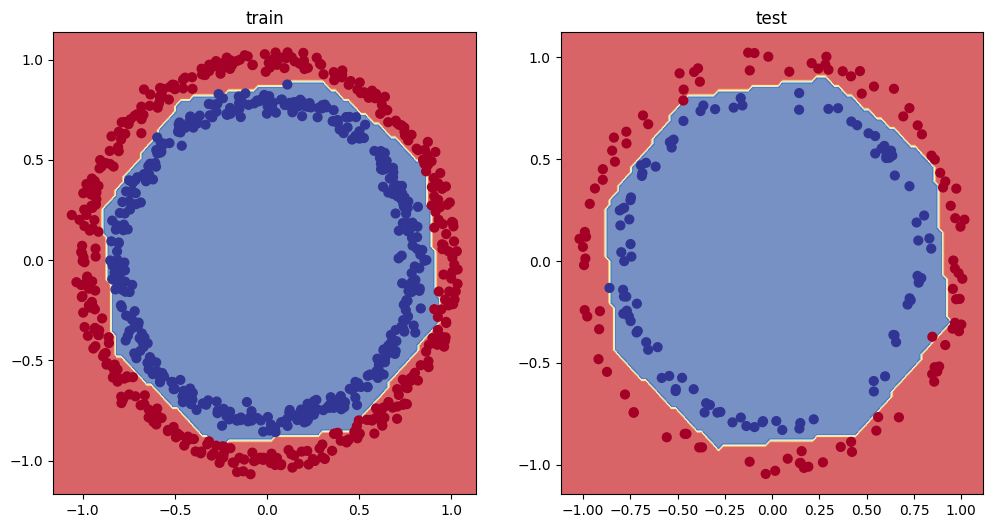

In [52]:
# plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('train')
plot_decision_boundary(model_10, x=x_train, y=y_train)

plt.subplot(1, 2, 2)
plt.title('test')
plot_decision_boundary(model_10, x=x_test, y=y_test)
plt.show()

And as we can see, almost perfect again.

These are the kind of experiments you'll be running often when building your own models.

Start with default settings and see how they perform on your data.

If they don't perform as well as you'd like, improve them.

---
# More classification evaluation models

Alongside the visualizations we've been making, there are number of different evaluation metrics we can use to evaluate our classification models.

+ **Accuracy:** Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it gets 95/100 predictions correct.

+ **Precision:** Proportion of true positives over total number of samples. Higher precision leads to less false positive (model predicts 1 when it should've been 0)

+ **Recall:** Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives.

+ **F1-score:** Combines precision and recall into one metric. 1 is best, 0 is worst.

+ **Confusion matrix:** Compares the predicted values with the true values in ta tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line)

+ **Classification report:** Collection of some of the main classification metrics such as precision, recall and f1-score.

Every classification problem will require different kinds of evaluation methods.

Let's start with accuracy.

Because we passed ['accuracy'] to the metrics parameter when we compiled our model, calling evaluate() on it will return the loss as well as accuracy.

In [53]:
# check the accuracy of our 
loss, accuracy = model_10.evaluate(x_test, y_test)
print(f'model loss on set set: {loss}')
print(f'model accuracy on test set: {(100*accuracy):.2f}%')

1/7 [===>..........................] - ETA: 0s - loss: 0.0562 - accuracy: 1.0000

7/7 [==============================] - 0s 1ms/step - loss: 0.0508 - accuracy: 0.9900
model loss on set set: 0.050824590027332306
model accuracy on test set: 99.00%


How about a confusion matrix?

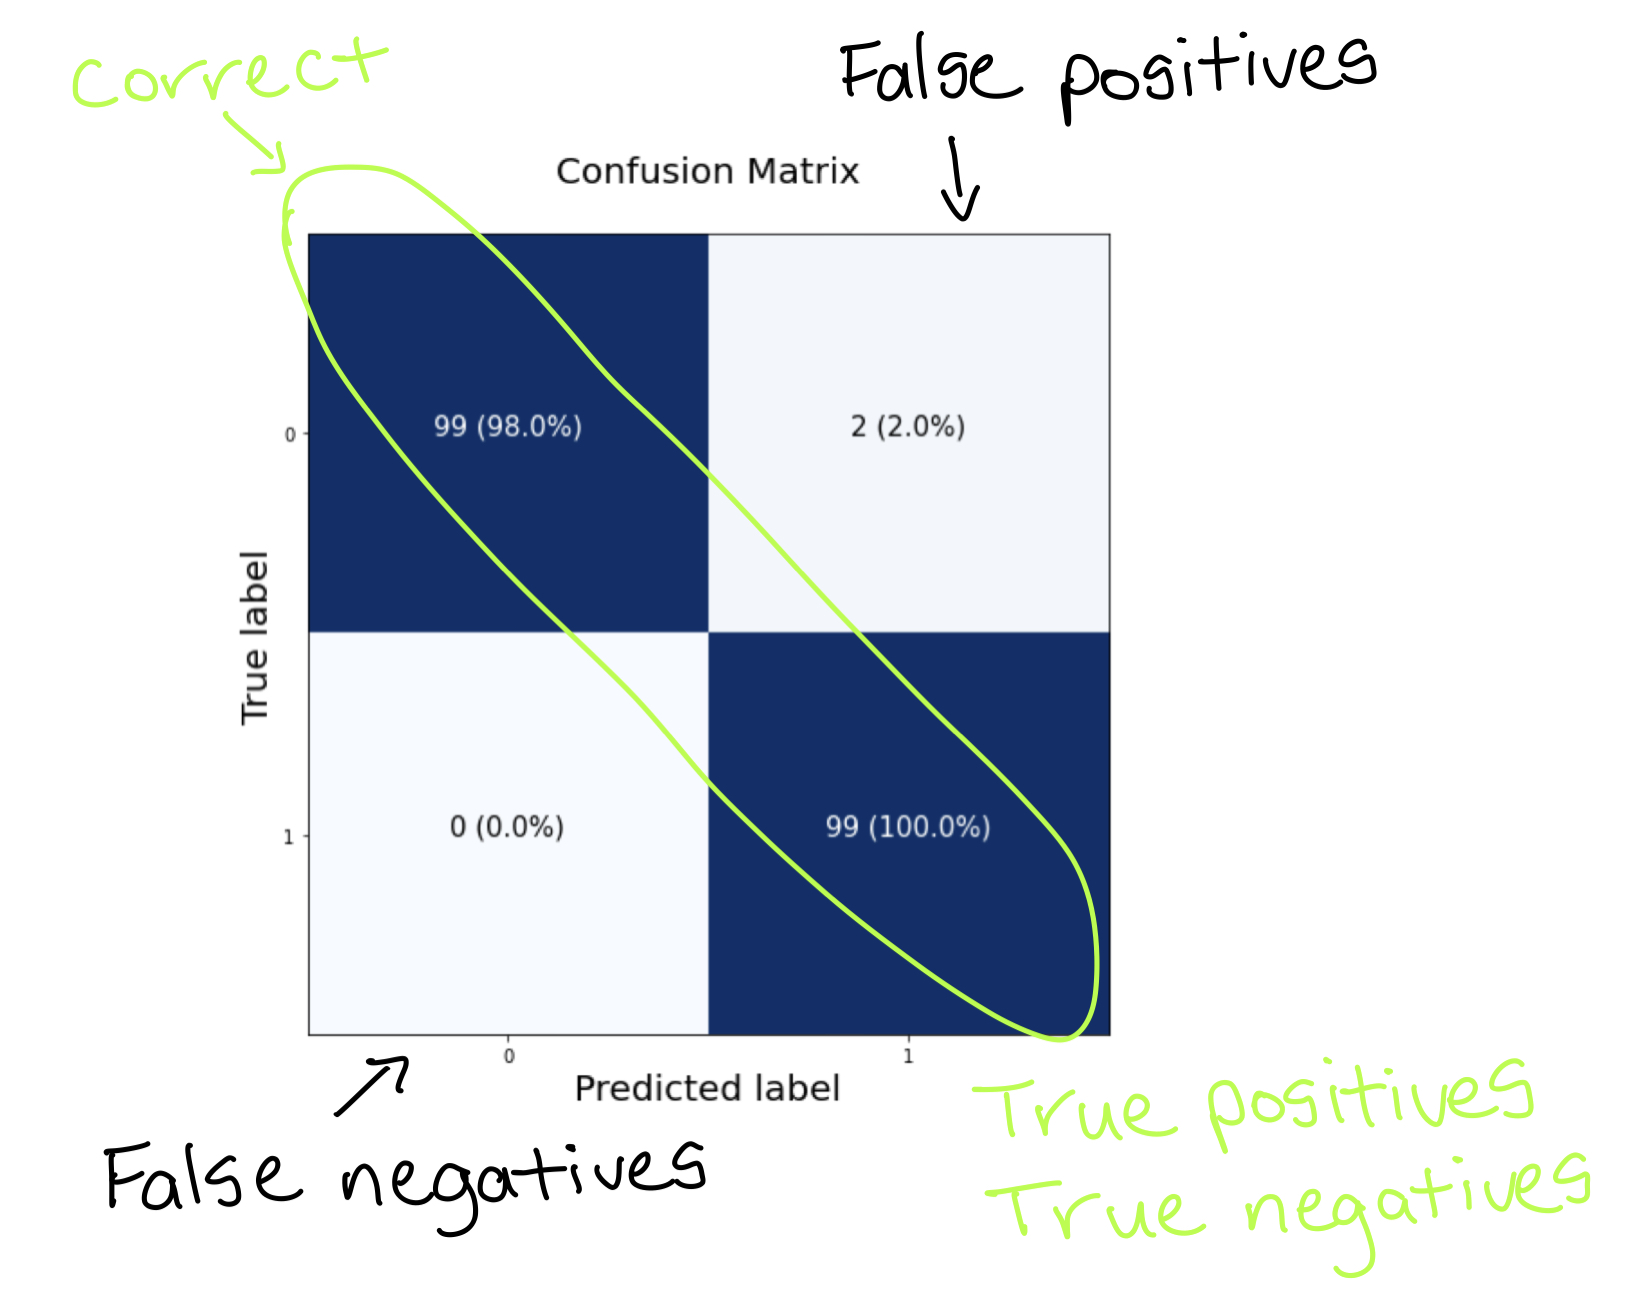

Anatomy of a confusion matrix, correct predictions appear down the diagonal (from top left to bottom right).

We can make a confusion matrix using Scikit-Learn's confusion_matrix method.

In [54]:
# create a confusion matrix
from sklearn.metrics import confusion_matrix

# make predictions
y_preds = model_10.predict(x_test)

# create confusion matrix
confusion_matrix(y_test, y_preds)

# !!! BILEREK ALINMIS HATA

7/7 [==============================] - 0s 666us/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

It seems our predictions are not in the format they need to be.

Let's check them out.

In [55]:
# view the first 10 predictions
y_preds[:10]

array([[0.97337335],
       [0.97337335],
       [0.97337335],
       [0.97337335],
       [0.07833523],
       [0.00612292],
       [0.89387363],
       [0.00986552],
       [0.97337335],
       [0.23501116]], dtype=float32)

What about our test labels?

In [56]:
# view the first 10 test labels
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

It looks like we need to get our predictions into the binary format (0 or 1)

In their current format (9.8526537e-01), they're in a form called **prediction probabilities.**

They won't be exact values but more a probability of how likely they are to be one value or another.

What we need to do is converting the prediction probabilities into labels.

In our case, since our ground truth labels (y_test) are binary (0 or 1), we can convert the prediction probabilities using to their binary form using tf.round().

In [57]:
# convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

Now we can use 'confusion_matrix' function.

In [58]:
# create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[100,   1],
       [  1,  98]], dtype=int64)

We can see the highest numbers are down the diagonal (from top left to bottom right) so this a good sign, but the rest of the matrix doesn't really tell us much.

How about we make a function to make our confusion matrix a little more visual?

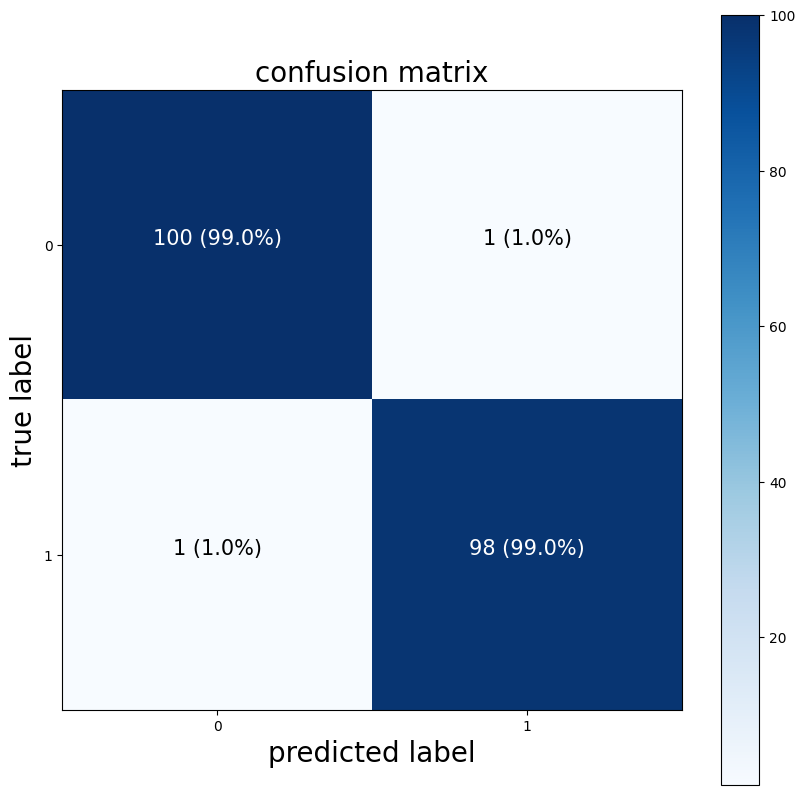

In [59]:
import itertools

figsize = (10, 10)

# create a confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# let's prettify it
fig, ax = plt.subplots(figsize=figsize)

# create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# create classes
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])
    
# label the axis
ax.set(title='confusion matrix',
       xlabel='predicted label',
       ylabel='true label',
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# set x-axis labels to bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# set threshold for different colors
threshold = (cm.max() + cm.min()) / 2

# plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)',
             horizontalalignment='center',
             color='white' if cm[i, j] > threshold else 'black',
             size=15)

It seems our model has made almost perfect predictions on the test set except for two false positives (top right corner).

In [60]:
# what does itertools.product do? Combines two things into each combination

import itertools
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    print(i, j)

0 0
0 1
1 0
1 1


---
# Working with a larger example (multiclass classification)

We've seen a binary classification example.

For example, say you were a fashion company and you wanted to build a neural network to predict whether a piece of clothing was a shoe, a shirt or a jacket (3 different options).

When you have more than two classes as an option, this is known as multiclass classification.

In [61]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# the data has already been sorted into training and test sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [62]:
# show the first training example
print(f'training sample:\n{train_data[0]}\n')
print(f'training label: {train_labels[0]}')


training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

What about the shapes?

In [63]:
# check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

# train_data veri kümesinde 60.000 adet örnek bulunmaktadır. 
# Her bir örnek, 28x28 piksel boyutlarında bir görüntüyü temsil etmektedir.

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

+ 'train_data' veri kümesinde 60.000 adet örnek bulunmaktadır. Her bir örnek, 28x28 piksel boyutlarında bir görüntüyü temsil etmektedir.

28x28 piksel boyutlarında her bir görüntü, 784 (28x28) boyutlu bir vektör olarak düşünülebilir. Toplamda 60.000 örneği olan bir veri kümesi, bu 784-boyutlu vektörlerden oluşan bir matrisi temsil eder.

In [64]:
# check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

60.000 training examples each with shape (28, 28) and a label each as well as 10.000 test examples of shape (28, 28).

Let's visualize.

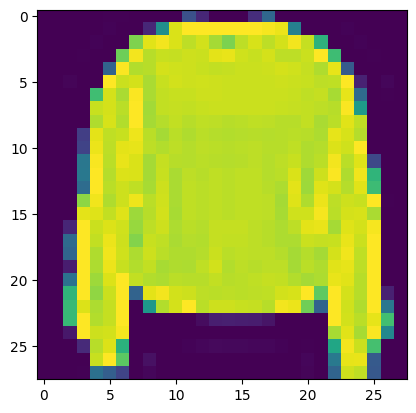

In [65]:
# plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

What about it's label?

In [66]:
# check our samples label
train_labels[7]

2

It looks like our labels are in numerical form. And while this is fine for a neural network, you might want to have them in human readable form.

Lets create a small list of the class names (we can find them on the dataset's GitHub page:
https://github.com/zalandoresearch/fashion-mnist#labels)

In [67]:
class_names = ['tshirt/top', 'trouser', 'pullover', 'dress', 'coat', 'sandal',
               'shirt', 'sneaker', 'bag', 'ankle boot']

# how many classes are there? (this'll be our output shape)
len(class_names)

10

Lets plot another example

Text(0.5, 1.0, 'tshirt/top')

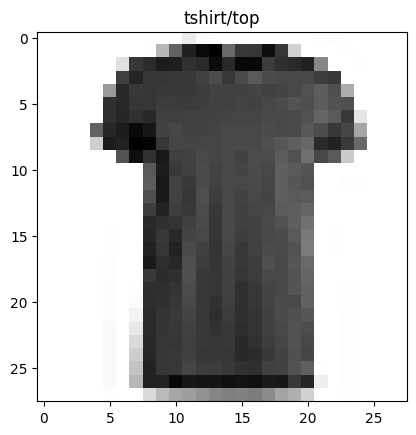

In [68]:
# plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change colors to black and white
plt.title(class_names[train_labels[17]])

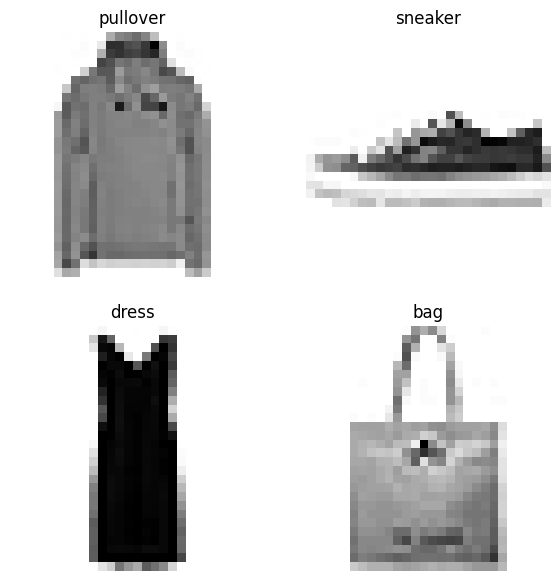

In [69]:
# plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

Let's build a model to figure out the relationship between the pixel values and their labels.

Since this is multiclass classification problem, we'll need to make a few changes to our architecture (inline with table 1 above):

+ The **input shape** will have to deal with 28x28 tensors (the height and width of our images)
    + We're actually going to squash the input into a tensor (vector) of shape (28x28=784).

+ The **output shape** will have to be 10 because we need our model to predict for 10 different classes.
    + We'll also change the activation parameter of our output layer to be 'softmax' instead of 'sigmoid'. As we'll see the 'softmax' activation function outputs a series of values between 0 & 1 (the same shape as **output shape**, which together add up to ~1. The index with the highest value is predicted by the model to be the most likely class.)

+ We'll need to change our loss function from a binary loss function to a multiclass loss function.
    + More specifically, since our labels are in integer form, we'll use 'tf.keras.losses.SparseCategoricalCrossentropy()'.
    + If our labels wew one-hot encoded (e.g. they looked something like [0, 0, 1, 0, 0,...]) we'd use 'tf.keras.losses.CategoricalCrossentropy().

+ We'll also use the 'validation_data' parameter when calling the 'fit()' function. This will give us an idea of how the model performs on the test set during training.

In [70]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), # input layer. 28x28=784. resim verisini duzlestirdik.
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') # output shape = 10, activaton = 'softmax'
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classification
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy']
                 )

non_normalized_history = model_11.fit(train_data,
                                      train_labels,
                                      epochs=10,
                                      validation_data=(test_data, test_labels)) # see how model performs on test set during training

Epoch 1/10
1875/1875 [==============================] - 2s 857us/step - loss: 2.3002 - accuracy: 0.1492 - val_loss: 1.9817 - val_accuracy: 0.2175
Epoch 2/10
1875/1875 [==============================] - 1s 753us/step - loss: 1.8888 - accuracy: 0.2479 - val_loss: 1.7408 - val_accuracy: 0.2654
Epoch 3/10
1875/1875 [==============================] - 1s 759us/step - loss: 1.6736 - accuracy: 0.2773 - val_loss: 1.6211 - val_accuracy: 0.3132
Epoch 4/10
1875/1875 [==============================] - 1s 761us/step - loss: 1.5482 - accuracy: 0.3400 - val_loss: 1.5139 - val_accuracy: 0.3533
Epoch 5/10
1875/1875 [==============================] - 1s 770us/step - loss: 1.4853 - accuracy: 0.3542 - val_loss: 1.4763 - val_accuracy: 0.3400
Epoch 6/10
1875/1875 [==============================] - 2s 881us/step - loss: 1.4522 - accuracy: 0.3654 - val_loss: 1.4570 - val_accuracy: 0.3469
Epoch 7/10
1875/1875 [==============================] - 2s 869us/step - loss: 1.4299 - accuracy: 0.3766 - val_loss: 1.4676 -

In [71]:
# check the shapes of our model
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 4)                 3140      
                                                                 
 dense_29 (Dense)            (None, 4)                 20        
                                                                 
 dense_30 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


~30% oranında doğruluk oranımız var.

Elimizdeki verileri normalize etmemiz lazım. (0 ve 1 arasında olmalı)

It's pixel values are between 0 and 255

In [72]:
# check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

255'e bölerek normalize işlemini yapabiliriz.

In [73]:
# divide train and test images by the maximum value (normalize it)
train_data = train_data / 255
test_data = test_data / 255

# check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

Now our data is between 0 and 1. Let's see what happens when we model it.

We'll use the same model as before (model_11) except this time the data will be normalized.

In [74]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer='Adam',
                 metrics=['accuracy'])

normalized_history = model_12.fit(train_data,
                                  train_labels,
                                  epochs=10,
                                  validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 2s 868us/step - loss: 1.2077 - accuracy: 0.5651 - val_loss: 0.8760 - val_accuracy: 0.7093
Epoch 2/10
1875/1875 [==============================] - 1s 788us/step - loss: 0.7588 - accuracy: 0.7335 - val_loss: 0.7311 - val_accuracy: 0.7464
Epoch 3/10
1875/1875 [==============================] - 1s 780us/step - loss: 0.6794 - accuracy: 0.7497 - val_loss: 0.6891 - val_accuracy: 0.7360
Epoch 4/10
1875/1875 [==============================] - 1s 798us/step - loss: 0.6545 - accuracy: 0.7527 - val_loss: 0.6802 - val_accuracy: 0.7526
Epoch 5/10
1875/1875 [==============================] - 1s 788us/step - loss: 0.6399 - accuracy: 0.7565 - val_loss: 0.6600 - val_accuracy: 0.7585
Epoch 6/10
1875/1875 [==============================] - 1s 778us/step - loss: 0.6284 - accuracy: 0.7606 - val_loss: 0.6689 - val_accuracy: 0.7511
Epoch 7/10
1875/1875 [==============================] - 1s 776us/step - loss: 0.6214 - accuracy: 0.7623 - val_loss: 0.6458 -

We used the exact same model as before but we with normalized data we're now seeing a much higher accuracy value.

Let's plot each model's history (their loss curve)

<Axes: title={'center': 'normalized data'}>

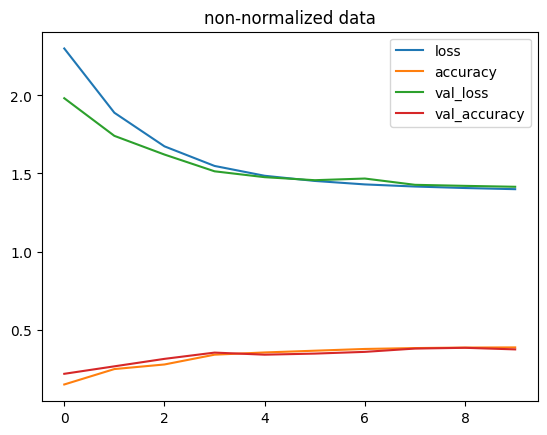

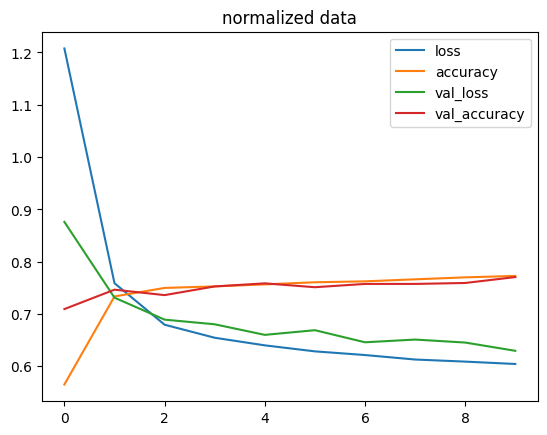

In [75]:
import pandas as pd

# plot non-normalized data loss curves
pd.DataFrame(non_normalized_history.history).plot(title='non-normalized data')
pd.DataFrame(normalized_history.history).plot(title='normalized data')

How about we find the ideal leraning rate and see what happens?

We'll use the same architecture we've been using.

In [76]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # we had to reshape 28x28 to 784
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer='Adam',
                 metrics=['accuracy'])

# create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 2s 874us/step - loss: 1.0563 - accuracy: 0.6090 - val_loss: 0.7171 - val_accuracy: 0.7520 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 1s 779us/step - loss: 0.6499 - accuracy: 0.7702 - val_loss: 0.6460 - val_accuracy: 0.7736 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 1s 796us/step - loss: 0.5981 - accuracy: 0.7893 - val_loss: 0.6184 - val_accuracy: 0.7875 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 2s 808us/step - loss: 0.5672 - accuracy: 0.8047 - val_loss: 0.5904 - val_accuracy: 0.7987 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 1s 785us/step - loss: 0.5493 - accuracy: 0.8105 - val_loss: 0.5736 - val_accuracy: 0.8000 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 1s 787us/step - loss: 0.5372 - accuracy: 0.8152 - val_loss: 0.6039 - val_accuracy: 0.7948 - lr: 0.0018
Epoch 7/40
1875/1875 [========================

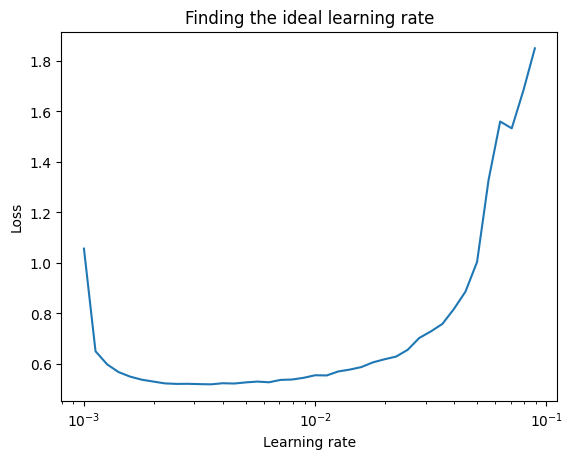

In [77]:
# plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")
plt.show()

In this case, it looks like somewhere close to the default learning rate of the Adam optimizer (0.001) is the ideal learning rate

Let's refit a model using the ideal learning rate.

In [78]:
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=['accuracy'])

history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 2s 839us/step - loss: 1.4813 - accuracy: 0.4245 - val_loss: 1.1736 - val_accuracy: 0.5414
Epoch 2/20
1875/1875 [==============================] - 1s 720us/step - loss: 1.0885 - accuracy: 0.5441 - val_loss: 1.0567 - val_accuracy: 0.5434
Epoch 3/20
1875/1875 [==============================] - 1s 780us/step - loss: 1.0128 - accuracy: 0.5568 - val_loss: 0.9999 - val_accuracy: 0.5706
Epoch 4/20
1875/1875 [==============================] - 1s 754us/step - loss: 0.9668 - accuracy: 0.5846 - val_loss: 0.9556 - val_accuracy: 0.6094
Epoch 5/20
1875/1875 [==============================] - 2s 807us/step - loss: 0.8801 - accuracy: 0.6587 - val_loss: 0.8339 - val_accuracy: 0.7064
Epoch 6/20
1875/1875 [==============================] - 2s 847us/step - loss: 0.7902 - accuracy: 0.7172 - val_loss: 0.8115 - val_accuracy: 0.7179
Epoch 7/20
1875/1875 [==============================] - 2s 830us/step - loss: 0.7583 - accuracy: 0.7200 - val_loss: 0.7820 -

Now, we've got a model trained with a close-to-ideal learning rate and performin pretty well, we've got a couple of options. 

We could:

+ Evaluate its performance using other classification metrics (such as a confusion matrix or classification report).
+ Assess some of its predictions (through visualizations).
+ Improve its accuracy (by training it for longer or changing the architecture).
+ Save and export it for use in an application.

Let's go through the first two options.

First we'll create a classification matrix to visualize its predictions accross the different classes

In [79]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
    # create confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with
    
    # plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)
    
    # are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
        
    # label the axes
    ax.set(title='confusion matrix',
           xlabel='predicted label',
           ylabel='true label',
           xticks=np.arange(n_classes), # create enough axis slots for each class
           yticks=np.arange(n_classes), 
           xticklabels=labels, # axes will labeled with class names (if they exist) or ints
           yticklabels=labels
           )
    
    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_normalized[i, j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                size=text_size)


Since a confusion matrix compares the truth labels (test_labels) to the predicted labels, we have to make some predictions with our model.

In [80]:
# make predictions with the most recent model
y_probs = model_14.predict(test_data) # probs is short for probabilities

# view the first 5 of predictions
y_probs[:5]

313/313 [==============================] - 0s 515us/step


array([[1.3246933e-28, 1.1323223e-10, 1.1521105e-09, 9.2523373e-35,
        1.9786403e-11, 3.0925626e-02, 1.6782238e-13, 1.5094624e-01,
        2.8367925e-03, 8.1529129e-01],
       [1.4859880e-04, 2.1394155e-07, 2.0930976e-01, 1.2474431e-04,
        6.1553711e-01, 2.3901617e-07, 8.9599974e-02, 2.7662261e-05,
        7.2152212e-02, 1.3099531e-02],
       [3.4709638e-03, 9.8036033e-01, 2.4408949e-04, 1.4339392e-02,
        3.0055549e-04, 1.4055794e-04, 9.2458364e-04, 9.0631329e-05,
        1.2446166e-04, 4.2798206e-06],
       [3.4095689e-03, 9.8083651e-01, 2.3983228e-04, 1.3956247e-02,
        2.9330101e-04, 1.4115118e-04, 9.0797228e-04, 8.9830646e-05,
        1.2150899e-04, 4.2113597e-06],
       [1.0285641e-01, 5.3952402e-04, 3.6505860e-01, 7.1632201e-03,
        7.1240373e-02, 1.7555825e-04, 4.5170090e-01, 3.7618269e-05,
        2.8188986e-04, 9.4588014e-04]], dtype=float32)

Our model outputs a list of **prediction probabilities**, meaning, it outputs a number for how likely it thinks a particular class is to be the label.

The higher the number in the prediction probabilities list, the more likely the model believes that is the right class.

To find the highest value we can use the 'argmax()' method.

In [81]:
# see the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'ankle boot')

In [82]:
# convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# view the first 10 prediction labels
y_preds[:10]

array([9, 4, 1, 1, 6, 1, 2, 2, 5, 7], dtype=int64)

We've got our model's predictions in label form, let's create a confusion matrix to view them against the truth labels.

In [83]:
# check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[766,   3,  12,  92,  13,   0, 105,   0,   8,   1],
       [  6, 921,   2,  58,   4,   0,   9,   0,   0,   0],
       [ 30,   0, 418,  14, 269,   0, 262,   0,   7,   0],
       [ 33,  13,   3, 842,  49,   0,  40,   0,  20,   0],
       [  2,   0, 139,  43, 718,   0,  69,   0,  28,   1],
       [  0,   0,   3,   0,   0, 875,   1,  70,   5,  46],
       [174,   0, 243,  54, 213,   0, 308,   0,   8,   0],
       [  0,   0,   0,   0,   0,  34,   0, 898,   2,  66],
       [  1,   1,  10,  17,  82,   3,  10,   6, 861,   9],
       [  0,   0,   3,   0,   2,  14,   0,  35,   0, 946]], dtype=int64)

That confusion matrix is hard to comprehend, let's make it prettier using the function we created before.

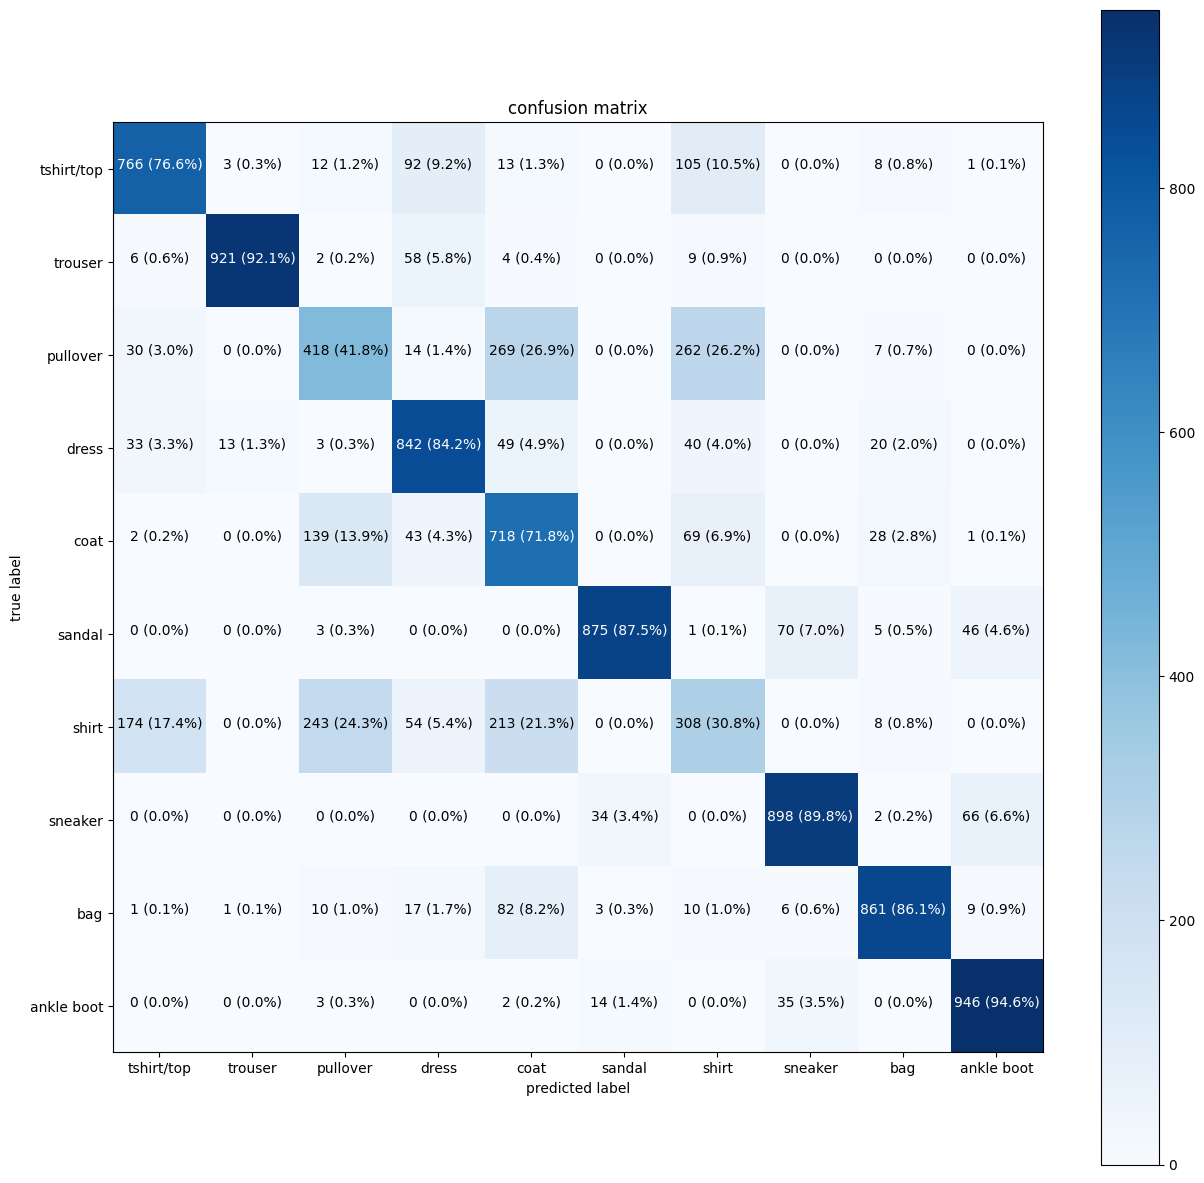

In [84]:
# make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

It looks like our model is getting confused between the Shirt and T-shirt/top classes (e.g. predicting Shirt when it's actually a T-shirt/top).

Let's create a function to plot a random image along with its prediction.

In [85]:
import random

def plot_random_image(model, images, true_labels, classes):
    ''' Picks a random image, plots it and labels it with a predicted 
    and truth label.
    
    Args: 
        model: a trained model (trained on data similar to what's in images)
        images: a set of random images (in tensor form)
        true_labels: array of ground truth labels for images
        classes: array of class names for images
        
    Returns: 
        A plot of a random image from 'images' with predicted class label from
        'model' as well as the truth class label from 'true_labels'.
    
    '''
    
    # setup random integer
    i = random.randint(0, len(images))
    
    # create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28)) # reshape to get into right size for model
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]
    
    # plot the target image
    plt.imshow(target_image, cmap=plt.cm.binary)
    
    # change the color of the titles dpeending on if the prediction is right or wrong
    if pred_label == true_label:
        color = 'green'
    else:
        color = 'red'
        
    # add xlabel informatin (prediction / true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red


1/1 [==============================] - 0s 15ms/step


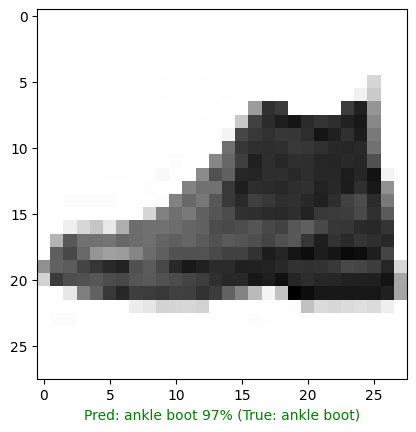

In [86]:
# check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

After running the cell above a few times you'll start to get a visual understanding of the relationship between the model's predictions and the true labels.

Did you figure out which predictions the model gets confused on?

It seems to mix up classes which are similar, for example, Sneaker with Ankle boot.

Looking at the images, you can see how this might be the case.

The overall shape of a Sneaker and an Ankle Boot are similar.

The overall shape might be one of the patterns the model has learned and so therefore when two images have a similar shape, their predictions get mixed up. 

---
# What patterns is our model learning?

We've been talking a lot about how a neural network finds patterns in numbers, but what exactly do these patterns look like?

Let's crack open one of our models and find out.

First, we'll get a list of layers in our most recent model (model_14) using the layers attribute.

In [87]:
# find the layers of our most recent model

model_14.layers

We can access a target layer using indexing.

In [88]:
# extract a particular layer

model_14.layers[1]

And we can find the patterns learned by a particular layer using the get_weights() method.

The get_weights() method returns the **weights** (also known as a weights matrix) and biases (also known as a bias vector) of a particular layer.

In [89]:
# get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# shape = 1 weight matrix size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[-0.0224438 ,  0.03308161, -0.5394273 ,  0.260528  ],
        [ 0.08419847,  0.5643357 , -0.57399374, -0.11321446],
        [ 0.05603844,  0.26622134, -1.0197412 , -0.3159392 ],
        ...,
        [ 0.01398695, -0.16582826,  0.08101436, -0.09990567],
        [ 0.0608992 , -0.24947959,  0.22883694, -0.721362  ],
        [-0.00192036, -0.570779  , -0.10576025,  0.04479301]],
       dtype=float32),
 (784, 4))

**!!! The weights matrix is the same shape as the input data, which in our case is 784 (28x28 pixels). And there's a copy of the weights matrix for each neuron in the selected layer (our selected layer has 4 neurons).**

Each value in the weights matrix corresponds to how a particular value in the input data influences the network's decisions. (ANLAMADIM)

These values start out as random numbers (they're set by the 'kernel_initializer parameter' when creating a layer, the default is 'glorot_uniform') and are then updated to better representive values of the data (non-random) by the neural network during training.

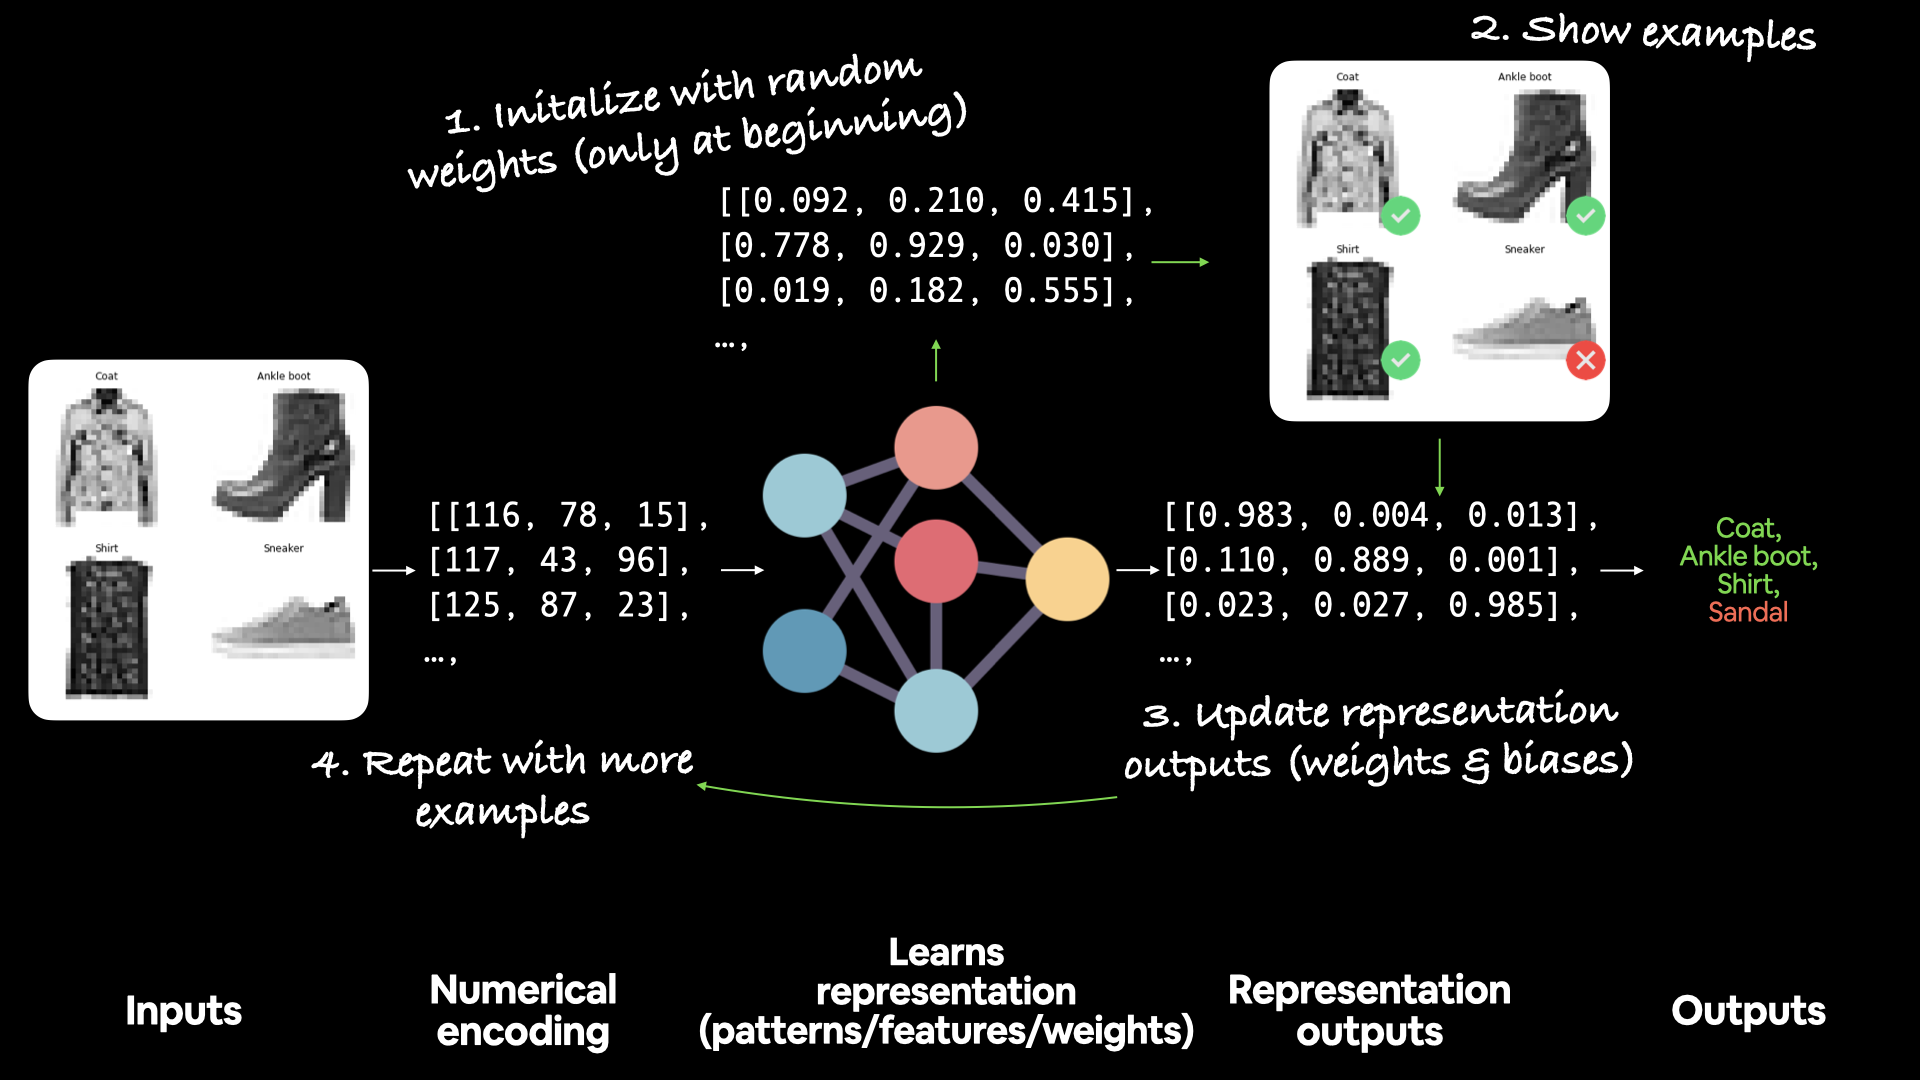

*Example of workflow of how a supervised neural network starts with random weights and updates them to better represent the data by looking at examples of ideal outputs.*

Now let's check out the bias vector.

In [90]:
# shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape

(array([-0.01453285,  2.286063  ,  2.7375684 ,  2.1026742 ], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weight matrix.

The bias values get initialized as zeroes by default (using the 'bias_initializer' parameter).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [91]:
# can now calculate the number of parameters in our model
model_14.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_37 (Dense)            (None, 4)                 3140      
                                                                 
 dense_38 (Dense)            (None, 4)                 20        
                                                                 
 dense_39 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


It's good time to point out the whole concept of inputs and outputs not only relates to model as a whole but to every layer within a model.

Starting from the input layer, each subsequent layer's input is the output of the previous layer.

We can see this clearly using the utility plot_model().

In [92]:
from tensorflow.keras.utils import plot_model

# see the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


---
# How a model learns (in brief)

+ We've trained a bunch of models, but we'be never really discussed what's going on under the hood. So how exactly does a model learn?

+ A model learns by updating and improving its weight matrices and biases values every epoch (in our case, when we call the fit() function).

+ It does so by comparing the patterns its learned between the data and labels to the actual labels.

+ If the current patterns (weight matrices and bias values) don't result in a desirable decrease in the loss function (higher loss means worse predictions), the optimizer tries to steer the model to update its patterns in the right way (using the real labels as a reference).

+ This process of using the real labels as a reference to improve the model's predictions is called **backpropagation**.

+ In other words, data and labels pass through a model (**forward pass**) and it attempts to learn the relationship between the data and labels.

+ And if this learned relationship isn't close to the actual relationship or it could be improved, the model does so by going back through itsel (**backward pass**) and tweaking its weights matrices and bias values to better represent the data.

+ If all of this sounds confusing (and it's fine if it does, the above is a very succinct description), check out the resources in the extra-cirruculum section for more.